- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계싼한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [3]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train, test_size = 0.2, random_state = 12)

In [4]:
# 모델 정의
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = "relu"))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation = "softmax"))
    
    return model

In [5]:
model = model_fn()

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [8]:
history = model.fit(scaled_train, y_train, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7688 - loss: 0.6700
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8565 - loss: 0.4034
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8711 - loss: 0.3619
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8794 - loss: 0.3346
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8887 - loss: 0.3148


- verbose
    - 훈련 과정 출력을 조정
    - 0 : 훈련 과정 출력 안함
    - 1 : 에포크마다 진행 막대와 함께 지표 출력
    - 2 : 진행 막대를 빼고 출력

In [9]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy를 추가하여서 loss와 accuracy가 포함됨

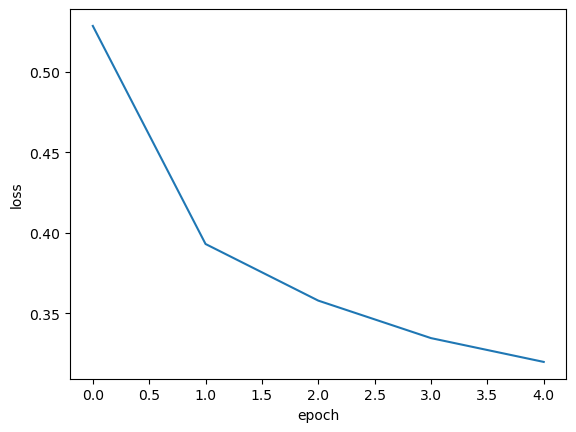

In [10]:
plt.figure()

plt.plot(history.history["loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

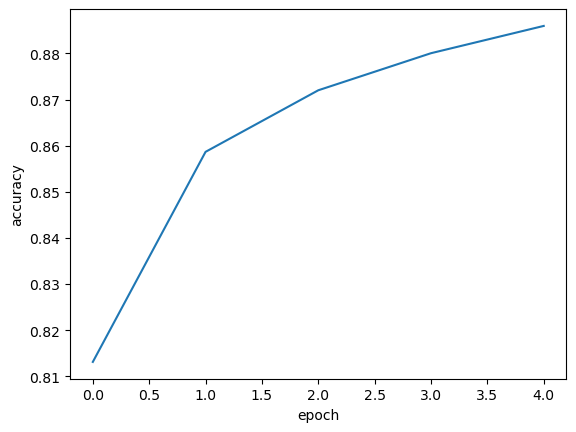

In [11]:
plt.figure()

plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [12]:
# epoch 를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7629 - loss: 0.6763
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8529 - loss: 0.4078
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8712 - loss: 0.3585
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8797 - loss: 0.3382
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8873 - loss: 0.3206
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8890 - loss: 0.3124
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8932 - loss: 0.2980
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8978 - loss: 0.2886
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8992 - loss: 0.2780
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9027 - loss: 0.2781
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9064 - loss: 0.2691
Epoch 12/20
1500/1500 ━━━━━━━━

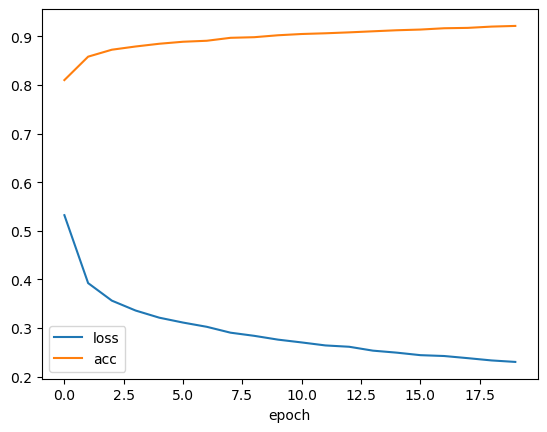

In [13]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [15]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7616 - loss: 0.6792 - val_accuracy: 0.8257 - val_loss: 0.4777
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8563 - loss: 0.4055 - val_accuracy: 0.8613 - val_loss: 0.3858
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8693 - loss: 0.3571 - val_accuracy: 0.8775 - val_loss: 0.3517
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8795 - loss: 0.3349 - val_accuracy: 0.8682 - val_loss: 0.3769
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8878 - loss: 0.3170 - val_accuracy: 0.8845 - val_loss: 0.3415
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8875 - loss: 0.3084 - val_accuracy: 0.8818 - val_loss: 0.3430
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8933 - loss: 0.2955 - val_accuracy: 0.8681 - val_loss: 0.3886
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8961 - loss: 0.2917 - 

In [16]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [17]:
history.history

{'accuracy': [0.8105624914169312,
  0.8585000038146973,
  0.8695416450500488,
  0.8793749809265137,
  0.885979175567627,
  0.8883749842643738,
  0.893541693687439,
  0.8980208039283752,
  0.8993958234786987,
  0.9024583101272583,
  0.9044374823570251,
  0.9071875214576721,
  0.9074791669845581,
  0.909541666507721,
  0.9139583110809326,
  0.913729190826416,
  0.9165416955947876,
  0.917145848274231,
  0.9194375276565552,
  0.9215208292007446],
 'loss': [0.5358025431632996,
  0.39543774724006653,
  0.3586510121822357,
  0.33563145995140076,
  0.32125169038772583,
  0.30874618887901306,
  0.29764172434806824,
  0.28888604044914246,
  0.2832619249820709,
  0.27600863575935364,
  0.26941242814064026,
  0.2623860239982605,
  0.25744035840034485,
  0.25220611691474915,
  0.24720875918865204,
  0.2417754977941513,
  0.23717142641544342,
  0.23537036776542664,
  0.22807645797729492,
  0.22621238231658936],
 'val_accuracy': [0.8256666660308838,
  0.8613333106040955,
  0.8774999976158142,
  0.86

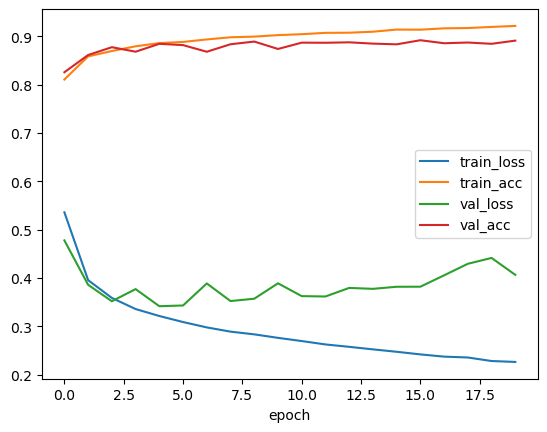

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [19]:
# Adma 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7698 - loss: 0.6709 - val_accuracy: 0.8547 - val_loss: 0.4165
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8544 - loss: 0.4102 - val_accuracy: 0.8662 - val_loss: 0.3750
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8693 - loss: 0.3547 - val_accuracy: 0.8708 - val_loss: 0.3673
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8783 - loss: 0.3329 - val_accuracy: 0.8737 - val_loss: 0.3473
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8857 - loss: 0.3114 - val_accuracy: 0.8866 - val_loss: 0.3241
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8906 - loss: 0.2964 - val_accuracy: 0.8843 - val_loss: 0.3231
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8955 - loss: 0.2817 - val_accuracy: 0.8852 - val_loss: 0.3287
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9017 - loss: 0.2675 - 

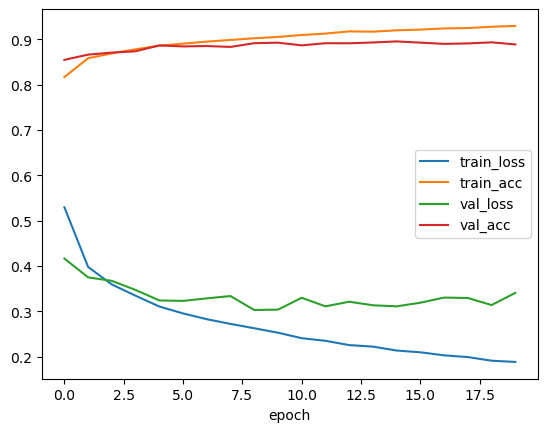

In [20]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- RMSprop 을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropout)

<img src = "./image/dropout.png">

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터는 없음

In [21]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 드롭아웃
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 않아야 함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [22]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7338 - loss: 0.7639 - val_accuracy: 0.8506 - val_loss: 0.4162
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8371 - loss: 0.4502 - val_accuracy: 0.8648 - val_loss: 0.3791
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8529 - loss: 0.4046 - val_accuracy: 0.8673 - val_loss: 0.3724
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8577 - loss: 0.3940 - val_accuracy: 0.8773 - val_loss: 0.3404
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8685 - loss: 0.3674 - val_accuracy: 0.8785 - val_loss: 0.3350
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8694 - loss: 0.3548 - val_accuracy: 0.8797 - val_loss: 0.3415
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8699 - loss: 0.3479 - val_accuracy: 0.8789 - val_loss: 0.3333
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8751 - loss: 0.3383 - 

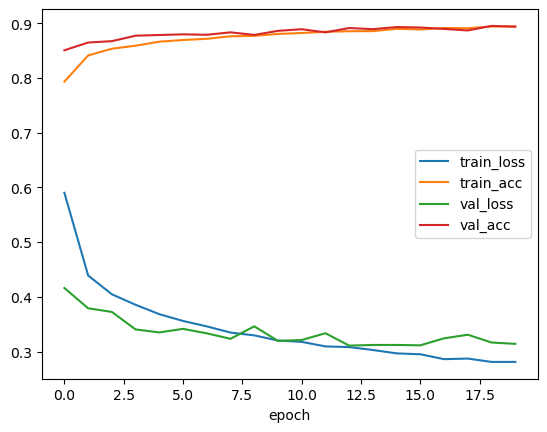

In [24]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨

# 모델 저장과 복원

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 13, validation_data = (scaled_val, y_val))

Epoch 1/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7281 - loss: 0.7762 - val_accuracy: 0.8534 - val_loss: 0.4072
Epoch 2/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8363 - loss: 0.4541 - val_accuracy: 0.8631 - val_loss: 0.3732
Epoch 3/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8528 - loss: 0.4011 - val_accuracy: 0.8721 - val_loss: 0.3505
Epoch 4/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8594 - loss: 0.3810 - val_accuracy: 0.8742 - val_loss: 0.3514
Epoch 5/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8604 - loss: 0.3731 - val_accuracy: 0.8769 - val_loss: 0.3420
Epoch 6/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8684 - loss: 0.3552 - val_accuracy: 0.8771 - val_loss: 0.3395
Epoch 7/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8753 - loss: 0.3402 - val_accuracy: 0.8818 - val_loss: 0.3218
Epoch 8/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8765 - loss: 0.3280 - 

- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공

In [39]:
model.save_weights("./model/model.weights.h5")

In [40]:
model.save("./model/model-whole.h5")

## 모델 파라미터만 읽어오기

In [50]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("./model/model.weights.h5")

- load_weights() 메서드를 사용하면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야함

In [55]:
val_labels = np.argmax(model.predict(scaled_val), axis = 1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [56]:
val_labels

array([3, 0, 8, ..., 0, 7, 5], dtype=int64)

In [57]:
y_val

array([3, 0, 8, ..., 0, 7, 5], dtype=uint8)

In [59]:
# 예측 정확도
np.mean(val_labels == y_val)

0.8918333333333334

- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어져 있기 때문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음
- argmax()로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 True, 다르면 False
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [61]:
model = keras.models.load_model("./model/model-whole.h5")

In [63]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8937 - loss: 0.2943


[0.3067614436149597, 0.8918333053588867]

# 콜백

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit()메서드의 callbacks 매개변수에 리스트로 전달하여 사용

## ModelCheckpoint 콜백

- 최상의 검증 점수를 만드는 모델을 저장

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.keras", save_best_only = True)

In [10]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7287 - loss: 0.7684 - val_accuracy: 0.8570 - val_loss: 0.4092
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8388 - loss: 0.4507 - val_accuracy: 0.8603 - val_loss: 0.3800
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8504 - loss: 0.4066 - val_accuracy: 0.8631 - val_loss: 0.3768
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8563 - loss: 0.3935 - val_accuracy: 0.8724 - val_loss: 0.3463
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8691 - loss: 0.3597 - val_accuracy: 0.8754 - val_loss: 0.3448
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8683 - loss: 0.3528 - val_accuracy: 0.8810 - val_loss: 0.3389
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8738 - loss: 0.3413 - val_accuracy: 0.8827 - val_loss: 0.3266
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8787 - loss: 0.3310

- 모델이 훈련한 후에 best-model.keras 에 최상의 val_loss 를 낸 모델이 저장됨

In [11]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8862 - loss: 0.3196


[0.33064866065979004, 0.8885833621025085]

In [12]:
model = keras.models.load_model("./model/best-model.keras")

In [13]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8918 - loss: 0.3061


[0.3152696490287781, 0.8934166431427002]

- modelCheckpoint 콜백이 가장 낮은 검증 손실값의 모델을 자동으로 저장해주어 편하지만 여전히 20번의 훈련을 해야해서 불편함이 있음

## EarlyStopping 콜백

- 과대적합이 시작되기 전에(검증 점수가 상승할 때) 훈련을 미리 중지하는 것을 조기 종료(erarly stopping)라고 부름
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중하나로 여겨지기도 함

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

- patience
    - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
    - patience가 2라면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
    
- restore_best_weights
    - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7364 - loss: 0.7542 - val_accuracy: 0.8414 - val_loss: 0.4252
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8404 - loss: 0.4445 - val_accuracy: 0.8617 - val_loss: 0.3839
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8516 - loss: 0.4064 - val_accuracy: 0.8714 - val_loss: 0.3622
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8630 - loss: 0.3842 - val_accuracy: 0.8769 - val_loss: 0.3364
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8654 - loss: 0.3715 - val_accuracy: 0.8782 - val_loss: 0.3386
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8712 - loss: 0.3523 - val_accuracy: 0.8830 - val_loss: 0.3331
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8737 - loss: 0.3484 - val_accuracy: 0.8823 - val_loss: 0.3345
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8767 - loss: 0.3278 - 

In [17]:
# 몇 번째 에포크에서 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

10


- 10번째 에포크까지 훈련한 후 중지됨
    - patience가 2이기 때문에 8번째 에포크 때의 모델이 최상의 모델임

In [18]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.3075


[0.3170618414878845, 0.8855833411216736]

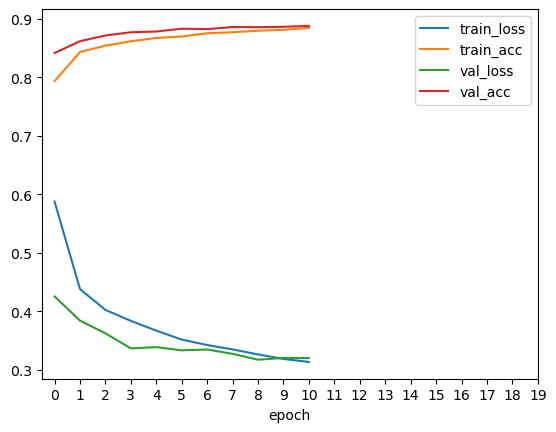

In [20]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xticks(ticks = range(20))
plt.legend()
plt.xlabel("epoch")
plt.show()

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나누어서 훈련/검증을 수행

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_test = x_test / 255

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_split = 0.2, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7230 - loss: 0.7820 - val_accuracy: 0.8422 - val_loss: 0.4292
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8370 - loss: 0.4545 - val_accuracy: 0.8545 - val_loss: 0.3946


In [24]:
import tensorflow as tf
tf.__version__

'2.16.1'